<a href="https://colab.research.google.com/github/CesarSandoval714/Mineria-de-datos-CSVUEFA/blob/main/FIFA_players_Ranking_ultimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cesar Jaziel Sandoval Mata

1.Adquisición de datos

In [80]:
import requests
import io
import numpy as np
from math import sqrt
import random as rd
from bs4 import BeautifulSoup
import pandas as pd
from tabulate import tabulate
from typing import Tuple, List
from scipy import stats
import re
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.cluster import KMeans



def get_soup(url: str) -> BeautifulSoup:
    response = requests.get(url)
    return BeautifulSoup(response.content, 'html.parser')

def get_csv_from_url(url:str) -> pd.DataFrame:
    s=requests.get(url).content
    return pd.read_csv(io.StringIO(s.decode('utf-8')))

def print_tabulate(df: pd.DataFrame):
    print(tabulate(df, headers=df.columns, tablefmt='orgtbl'))


df = get_csv_from_url("https://raw.githubusercontent.com/CesarSandoval714/Mineria-de-datos-CSVUEFA/main/FIFA%20PLAYERS%20RATINGS.csv")
df.head(1000)

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,24/06/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,14/02/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,15/03/1993,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,04/06/1991,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,20/06/1991,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164478,C. Obasi,Chinedu Obasi Ogbuke,01/06/1986,32,187.96,78.9,ST,Nigeria,72,...,57+2,56+2,56+2,56+2,57+2,55+2,53+2,53+2,53+2,55+2
996,16254,T. Howard,Tim Howard,06/03/1979,40,190.50,88.0,GK,United States,72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,168317,H. Goitom,Henok Goitom,22/09/1984,34,187.96,84.8,ST,Eritrea,72,...,54+2,58+2,58+2,58+2,54+2,51+2,54+2,54+2,54+2,51+2
998,220029,S. Khaoui,Saîf-Eddine Khaoui,27/04/1995,23,182.88,68.0,"CAM,RM,CM",Tunisia,72,...,57+2,54+2,54+2,54+2,57+2,53+2,44+2,44+2,44+2,53+2


# 2. Limpieza de datos

In [81]:
df.shape

(17954, 92)

In [82]:
#se eliminan columnas irrelavantes

df = df.drop(columns = ['national_team','national_rating','full_name','positions','potential','sliding_tackle','birth_date','preferred_foot', 'international_reputation(1-5)','weak_foot(1-5)','skill_moves(1-5)','work_rate','body_type','release_clause_euro','club_rating','club_position','club_jersey_number','national_team_position','national_jersey_number','crossing','finishing','heading_accuracy','short_passing','volleys','dribbling','curve','freekick_accuracy','long_passing','ball_control','acceleration','sprint_speed','agility','reactions','balance','shot_power','jumping','stamina','strength','long_shots','aggression','interceptions','positioning','vision','penalties','composure','marking','standing_tackle','GK_diving','GK_handling','GK_kicking','GK_positioning','GK_reflexes','tags','traits','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']) 
df.head(1000)






,id,name,age,height_cm,weight_kgs,nationality,overall_rating,value_euro,wage_euro,club_team,club_join_date,contract_end_year
0,158023,L. Messi,31,170.18,72.1,Argentina,94,110500000.0,565000.0,FC Barcelona,01/07/2004,2021
1,190460,C. Eriksen,27,154.94,76.2,Denmark,88,69500000.0,205000.0,Tottenham Hotspur,30/08/2013,2020
2,195864,P. Pogba,25,190.50,83.9,France,88,73000000.0,255000.0,Manchester United,09/08/2016,2021
3,198219,L. Insigne,27,162.56,59.0,Italy,88,62000000.0,165000.0,Napoli,01/07/2010,2022
4,201024,K. Koulibaly,27,187.96,88.9,Senegal,88,60000000.0,135000.0,Napoli,01/07/2014,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
995,164478,C. Obasi,32,187.96,78.9,Nigeria,72,2500000.0,8000.0,AIK,22/01/2019,2019
996,16254,T. Howard,40,190.50,88.0,United States,72,210000.0,3000.0,Colorado Rapids,04/07/2016,2019
997,168317,H. Goitom,34,187.96,84.8,Eritrea,72,2000000.0,8000.0,AIK,07/03/2017,2019
998,220029,S. Khaoui,23,182.88,68.0,Tunisia,72,4100000.0,25000.0,Stade Malherbe Caen,NaN,"Jun 30, 2019"


In [83]:
df.shape


(17954, 12)

In [84]:
df.isna().sum()


id                      0
name                    0
age                     0
height_cm               0
weight_kgs              0
nationality             0
overall_rating          0
value_euro            255
wage_euro             246
club_team              14
club_join_date       1936
contract_end_year     361
dtype: int64

In [85]:
#Eliminasmos las filas con NaN para lo columna de club_join_date (fecha de ingreso al club)
df = df[df['club_join_date'].notna()]


In [86]:
df.shape


(16018, 12)

In [87]:
df.isna().sum()

id                   0
name                 0
age                  0
height_cm            0
weight_kgs           0
nationality          0
overall_rating       0
value_euro           9
wage_euro            0
club_team            0
club_join_date       0
contract_end_year    0
dtype: int64

In [88]:
#Eliminasmos las filas con NaN para lo columna de value_euro (valor del jugador en euros)
df = df[df['value_euro'].notna()]

In [89]:
df.shape

(16009, 12)

In [90]:
valor_tabla = df['value_euro']
valor_tabla

0        110500000.0
1         69500000.0
2         73000000.0
3         62000000.0
4         60000000.0
            ...     
17949       975000.0
17950       190000.0
17951       170000.0
17952       280000.0
17953       325000.0
Name: value_euro, Length: 16009, dtype: float64

In [91]:
fechaContratacion_tabla = df['club_join_date']
fechaContratacion_tabla

0        01/07/2004
1        30/08/2013
2        09/08/2016
3        01/07/2010
4        01/07/2014
            ...    
17949    01/01/2010
17950    07/07/2017
17951    01/07/2016
17952    12/08/2017
17953    31/01/2019
Name: club_join_date, Length: 16009, dtype: object

In [92]:
type(df)


pandas.core.frame.DataFrame

# 3.Analisis de datos

In [93]:
df.club_join_date.unique()

array(['01/07/2004', '30/08/2013', '09/08/2016', ..., '01/08/2005',
       '14/07/2010', '04/08/2010'], dtype=object)

In [94]:
df.value_euro.unique()

array([1.105e+08, 6.950e+07, 7.300e+07, 6.200e+07, 6.000e+07, 5.950e+07,
       8.100e+07, 6.450e+07, 3.800e+07, 5.150e+07, 5.350e+07, 5.800e+07,
       7.800e+07, 7.850e+07, 8.900e+07, 2.050e+07, 4.650e+07, 3.400e+07,
       4.500e+07, 3.650e+07, 4.400e+07, 5.200e+07, 3.050e+07, 6.250e+07,
       5.050e+07, 3.100e+07, 4.250e+07, 4.000e+07, 4.050e+07, 4.150e+07,
       4.600e+07, 1.850e+07, 1.400e+07, 3.000e+07, 2.600e+07, 2.700e+07,
       2.250e+07, 2.800e+07, 3.300e+07, 2.950e+07, 3.450e+07, 3.550e+07,
       2.500e+07, 2.150e+07, 3.150e+07, 2.900e+07, 3.200e+07, 6.500e+06,
       1.650e+07, 3.250e+07, 9.000e+06, 1.800e+07, 2.100e+07, 2.200e+07,
       2.300e+07, 2.350e+07, 1.700e+07, 2.000e+07, 1.950e+07, 1.450e+07,
       1.550e+07, 4.500e+06, 1.050e+07, 6.000e+06, 5.500e+06, 1.500e+07,
       1.300e+07, 1.150e+07, 1.600e+07, 8.500e+06, 1.000e+06, 1.200e+07,
       7.000e+06, 9.500e+06, 2.000e+06, 1.750e+07, 1.000e+07, 1.350e+07,
       8.000e+06, 1.250e+07, 4.000e+06, 5.000e+06, 

In [95]:
gender_frame = pd.DataFrame(data=df['value_euro'])
gender_frame 
x=max(valor_tabla)
y=min(valor_tabla)
z= df["value_euro"].mean()
w=df["value_euro"].median()
m = df["value_euro"].mode()
r=df["value_euro"].count()
s=df["value_euro"].sum()
k=df["value_euro"].kurtosis()
v=df["value_euro"].var()
d=df["value_euro"].std()
print("Max {0}\n Min {1}\n Promedio {2}\n Mediana {3}\n moda {4}\n Conteo {5}\n Suma {6}\n Kutosis {7}\n Varianza {8}\n Desviacion Estandar {9}\n".format(x,y,z,w,m,r,s,k,v,d))

Max 110500000.0
 Min 10000.0
 Promedio 2437092.2606034107
 Mediana 675000.0
 moda 0    425000.0
dtype: float64
 Conteo 16009
 Suma 39015410000.0
 Kutosis 73.1784493508142
 Varianza 33742800371360.082
 Desviacion Estandar 5808855.340887745



In [96]:
g = df.groupby(['club_join_date','value_euro', 'name']).mean()
g

id   age  height_cm  \
club_join_date value_euro name                                         
01/01/1998     60000.0    H. Sogahata      140181.0  39.0     187.96   
01/01/2002     20000.0    Y. Kurihara      217645.0  35.0     182.88   
               250000.0   Kim Kwang Suk    184900.0  36.0     182.88   
               8500000.0  I. Akinfeev      148119.0  32.0     185.42   
01/01/2003     20000.0    M. McNulty       142333.0  38.0     187.96   
...                                             ...   ...        ...   
31/12/2018     40000.0    Ahn Byeong Geon  247591.0  30.0     187.96   
               110000.0   A. Reardon       246707.0  19.0     154.94   
               130000.0   B. Michel        247354.0  21.0     152.40   
               725000.0   Caíque           247287.0  25.0     185.42   
               875000.0   I. Camará        247288.0  20.0     190.50   

                                           weight_kgs  overall_rating  \
club_join_date value_euro name                                          
01/01/1998     60000.0    H. Sogahata            79.8            68.0   
01/01/2002     20000.0    Y. Kurihara            79.8            53.0   
               250000.0   Kim Kwang Suk          73.0            69.0   
               8500000.0  I. Akinfeev            78.0            80.0   
01/01/2003     20000.0    M. McNulty             69.9            62.0   
...                                               ...             ...   
31/12/2018     40000.0    Ahn Byeong Geon        81.2            52.0   
               110000.0   A. Reardon             74.8            54.0   
               130000.0   B. Michel              74.8            53.0   
               725000.0   Caíque                 74.8            65.0   
               875000.0   I. Camará              78.0            66.0   

                                           wage_euro  
club_join_date value_euro name                        
01/01/1998     60000.0    H. Sogahata         3000.0  
01/01/2002     20000.0    Y. Kurihara         1000.0  
               250000.0   Kim Kwang Suk       3000.0  
               8500000.0  I. Akinfeev         1000.0  
01/01/2003     20000.0    M. McNulty          1000.0  
...                                              ...  
31/12/2018     40000.0    Ahn Byeong Geon     1000.0  
               110000.0   A. Reardon          1000.0  
               130000.0   B. Michel           1000.0  
               725000.0   Caíque              3000.0  
               875000.0   I. Camará           1000.0  

[16008 rows x 6 columns]

In [97]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16009 entries, 0 to 17953
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 16009 non-null  int64  
 1   name               16009 non-null  object 
 2   age                16009 non-null  int64  
 3   height_cm          16009 non-null  float64
 4   weight_kgs         16009 non-null  float64
 5   nationality        16009 non-null  object 
 6   overall_rating     16009 non-null  int64  
 7   value_euro         16009 non-null  float64
 8   wage_euro          16009 non-null  float64
 9   club_team          16009 non-null  object 
 10  club_join_date     16009 non-null  object 
 11  contract_end_year  16009 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.6+ MB


#4. Graficación 

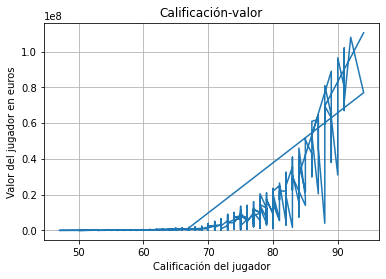

In [98]:
plt.plot(df['overall_rating'], df['value_euro'], label='value_euro')


plt.xlabel('Calificación del jugador')
plt.ylabel('Valor del jugador en euros')
plt.title('Calificación-valor')
plt.grid(True)

<BarContainer object of 16009 artists>

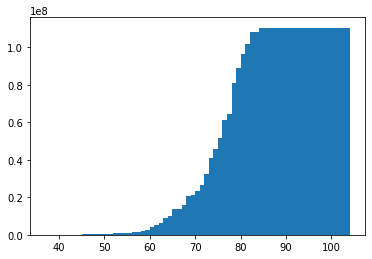

In [99]:
plt.bar(df['overall_rating'], df['value_euro'], width=20)

In [100]:
nacionalidades_tabla = df['nationality']
nacionalidades_tabla

0           Argentina
1             Denmark
2              France
3               Italy
4             Senegal
             ...     
17949        Scotland
17950        Slovakia
17951     Netherlands
17952    Saudi Arabia
17953          Brazil
Name: nationality, Length: 16009, dtype: object

In [102]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df['nationality'], y=df['value_euro']))

fig.update_layout(
    xaxis=dict(
        title_text='nationality',
        titlefont=dict(size=30),
    ),
    yaxis=dict(
        title_text='value_euro',
        
        titlefont=dict(size=30)
    ),
    title="Nacionalidades de jugadores con mas Ranking(Con mas valor)"
)

fig.show()

In [103]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df['nationality'], y=df['wage_euro']))

fig.update_layout(
    xaxis=dict(
        title_text='nationality',
        titlefont=dict(size=30),
    ),
    yaxis=dict(
        title_text="wage_euro",
        
        titlefont=dict(size=30)
    ),
    title="Nacionalidades de jugadores que mas ganan en Euros $"
)

fig.show()

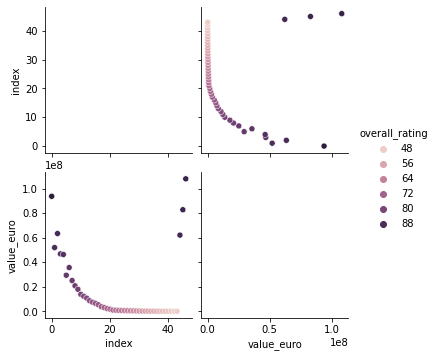

In [114]:
sns.pairplot(  califValor , hue='overall_rating')

# 5.Prueba de Hipotesis 

In [104]:
SalarioJugSwitzerland = df.wage_euro[df.nationality =='Switzerland']
SalarioJugColombia = df.wage_euro[df.nationality =='Colombia']


from scipy import stats
anova = stats.f_oneway(SalarioJugColombia, SalarioJugSwitzerland)
anova

F_onewayResult(statistic=26.416872865970795, pvalue=3.52414026768248e-07)

In [105]:
df.nationality.unique()

array(['Argentina', 'Denmark', 'France', 'Italy', 'Senegal',
       'Netherlands', 'Germany', 'Uruguay', 'Spain', 'Belgium', 'Egypt',
       'Slovakia', 'Brazil', 'Croatia', 'Costa Rica', 'Morocco',
       'Colombia', 'Sweden', 'Bosnia Herzegovina', 'Portugal', 'Mexico',
       'England', 'Austria', 'Iceland', 'Hungary', 'Wales', 'Ukraine',
       'Central African Rep.', 'Serbia', 'Ivory Coast', 'Cameroon',
       'Paraguay', 'Australia', 'Algeria', 'Romania', 'Russia', 'Israel',
       'Switzerland', 'Chile', 'Tunisia', 'Turkey', 'Nigeria', 'Norway',
       'Greece', 'Peru', 'United States', 'Iran', 'Equatorial Guinea',
       'Cape Verde', 'Tanzania', 'Scotland', 'China PR', 'Kosovo',
       'Montenegro', 'Canada', 'Madagascar', 'Mali', 'Guinea', 'Poland',
       'Cuba', 'Northern Ireland', 'Ghana', 'Japan', 'New Zealand',
       'Burkina Faso', 'Czech Republic', 'Slovenia', 'Belarus', 'Ecuador',
       'Gabon', 'FYR Macedonia', 'Curacao', 'DR Congo', 'Honduras',
       'Sierra Leone

In [106]:
stats.ttest_ind(df.wage_euro.loc[df.nationality=='Switzerland'],
                df.wage_euro.loc[df.nationality=='Colombia'],nan_policy='omit')

Ttest_indResult(statistic=5.139734707742296, pvalue=3.524140267682724e-07)

In [107]:
fig = go.Figure()
# Hipotesis de que los jugadores de Colombia ganan mas en promedio que los de Suiza 
fig.add_trace(go.Box(y=df.wage_euro.loc[df.nationality=='Colombia'],name="COLOMBIA"))
fig.add_trace(go.Box(y=df.wage_euro.loc[df.nationality=='Switzerland'],name="SUIZA"))
fig.update_layout(
    title={
        'text': "     Promedio de ganancia de jugadores COLOMBIA-SUIZA",
        'y':0.8,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

# 6. Regresion Lineal

Text(0.5, 1.0, 'Regresion Lineal Calificacion-Valor jugador')

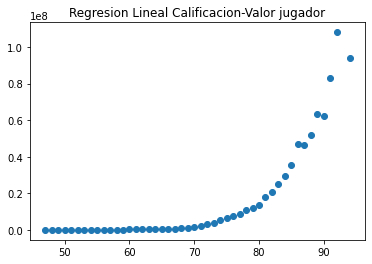

In [108]:
contratacionValor = pd.DataFrame()
contratacionValor['overall_rating'] = df['overall_rating']
contratacionValor ['value_euro']= df['value_euro']

contratacionValor = contratacionValor.groupby(pd.Grouper(key='overall_rating')).mean().reset_index()
contratacionValor=contratacionValor.reset_index()

modelo = LinearRegression().fit(contratacionValor['index'].values.reshape((-1,1)), contratacionValor['value_euro'])

meanLine = [[df['value_euro'].mean()],[df['value_euro'].mean()]]

plt.scatter(contratacionValor['overall_rating'], contratacionValor['value_euro'])
plt.title("Regresion Lineal Calificacion-Valor jugador")

Text(0.5, 1.0, 'Regresion Lineal Calificacion-ValorJugador')

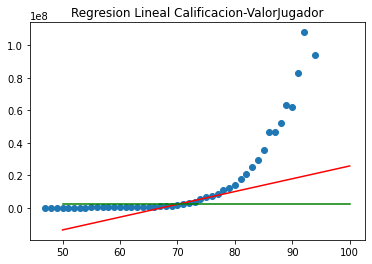

In [139]:
califValor = pd.DataFrame()
califValor['overall_rating'] = df['overall_rating']
califValor['value_euro']= df['value_euro']

califValor = califValor.groupby(pd.Grouper(key='overall_rating')).mean().reset_index()
califValor=califValor.reset_index()


modelo = LinearRegression().fit(califValor['index'].values.reshape((-1,1)), califValor['value_euro'])

meanLine = [[df['value_euro'].mean()],[df['value_euro'].mean()]]

plt.scatter(califValor['overall_rating'], califValor['value_euro'])
plt.plot([[50],[100]], modelo.predict([[94],[0.85]]), color = 'red') #Ranking = 60 , Valor =0.15millones
plt.plot([[50],[100]], meanLine, color = 'green')

plt.title("Regresion Lineal Calificacion-ValorJugador")



# 7.Forecasting

b =  26047240.043900747
m =  [-422580.83889327]
[-13675358.81206657  25688046.33084147]
2437092.2606034107


Text(0.5, 1.0, 'Regresion Lineal con forecasting año-precio')

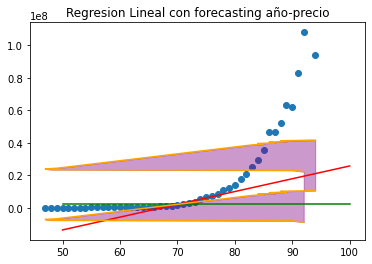

In [141]:
califValor = pd.DataFrame()
califValor['overall_rating'] = df['overall_rating']
califValor ['value_euro']= df['value_euro']

califValor = califValor.groupby(pd.Grouper(key='overall_rating')).mean().reset_index()
califValor=califValor.reset_index()


results = smf.ols('value_euro~index', califValor).fit()
predicts = results.predict()

bands = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]
coef = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']
m = coef.values[1]
b = coef.values[0]
low = bands['[0.025'][0]
hi = bands['0.975]'][0]



lowBand = m * califValor['index'] + low
highBand = m * califValor['index'] + hi


b0 = results.params[0]
b1 = results.params[1]
califValor['prediction'] = b0 + b1*califValor['value_euro']

modelo = LinearRegression().fit(califValor['index'].values.reshape((-1,1)), califValor['value_euro'])
print("b = ", modelo.intercept_)
print("m = ", modelo.coef_)

print(modelo.predict([[94],[0.85]]))
print(df['value_euro'].mean())

meanLine = [[df['value_euro'].mean()],[df['value_euro'].mean()]]

plt.scatter(califValor['overall_rating'], califValor['value_euro'])
plt.plot([[50],[100]], modelo.predict([[94],[0.85]]), color = 'red')
plt.plot([[50],[100]], meanLine, color = 'green')

plt.plot(califValor['overall_rating'], lowBand, color='orange')
plt.plot(califValor['overall_rating'], highBand, color='orange')
plt.fill_between(califValor['overall_rating'], lowBand, highBand, alpha=0.4, color = 'purple')
plt.title("Regresion Lineal con forecasting año-precio")